In [172]:
import numpy as np
import pandas as pd
from scipy.stats import randint
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [173]:
df = pd.read_csv('data/2014agg_regular_season_so.csv', dtype={'Goals_for':int})
df.columns
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 0 to 2459
Data columns (total 59 columns):
Unnamed: 0             2460 non-null int64
Game_Id                2460 non-null int64
Shot_Att               2460 non-null int64
Misses                 2460 non-null int64
SOG_for                2460 non-null int64
Hits_for               2460 non-null int64
Blocks_A               2460 non-null int64
Blocks_for             2460 non-null int64
Shot_Att_A             2460 non-null int64
SOG_A                  2460 non-null int64
Hits_A                 2460 non-null int64
Goals_for              2460 non-null int64
Goals_A                2460 non-null int64
Saves                  2460 non-null int64
Shot_Percentage_for    2460 non-null float64
Fenwick_for            2460 non-null int64
Corsi_for              2460 non-null int64
Corsi_A                2460 non-null int64
Fenwick_A              2460 non-null int64
FSH%                   2460 non-null float64
Miss%                  2460 n

In [174]:
y = df['Win'].values
X = df.drop(['Win','Season','Goals_for','Goals_A','Goals_for%','Sv%','wshF%','wshF','wshA'], axis=1).values

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [176]:
df2015 = pd.read_csv('data/2015agg_regular_season_so.csv', dtype={'Misses':int,'SOG_for':int,'Hits_for':int,'Goals_for':int,'Fenwick_for':int})
df2015.dropna(inplace=True)
df2015 = df2015.set_index(['Ev_Team'])
# get rid of the extra row
df2015.drop(['#'], inplace=True)
df2015 = df2015.reset_index()
df2015 = pd.get_dummies(df2015, drop_first=True)
df2015.info()
y_2015 = df2015['Win'].values
X_2015 = df2015.drop(['Win','Season','Goals_for','Goals_A','Goals_for%','Sv%','wshF%','wshF','wshA'], axis=1).values
#X_2015train, X_2015test, y_2015train, y_2015test = train_test_split(X, y, test_size = 0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 59 columns):
Unnamed: 0             2451 non-null int64
Game_Id                2451 non-null int64
Shot_Att               2451 non-null int64
Misses                 2451 non-null int64
SOG_for                2451 non-null int64
Hits_for               2451 non-null int64
Blocks_A               2451 non-null int64
Blocks_for             2451 non-null int64
Shot_Att_A             2451 non-null int64
SOG_A                  2451 non-null int64
Hits_A                 2451 non-null int64
Goals_for              2451 non-null int64
Goals_A                2451 non-null int64
Saves                  2451 non-null int64
Shot_Percentage_for    2451 non-null float64
Fenwick_for            2451 non-null int64
Corsi_for              2451 non-null int64
Corsi_A                2451 non-null int64
Fenwick_A              2451 non-null int64
FSH%                   2451 non-null float64
Miss%                  2451 n

In [177]:
df2016 = pd.read_csv('data/2016agg_regular_season_so.csv', dtype={'Goals_for':int})
df2016.dropna(inplace=True)
df2016 = pd.get_dummies(df2016, drop_first=True)
df.info()
y_2016 = df2016['Win'].values
X_2016 = df2016.drop(['Win','Season','Goals_for','Goals_A','Goals_for%','Sv%','wshF%','wshF','wshA'], axis=1).values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 0 to 2459
Data columns (total 59 columns):
Unnamed: 0             2460 non-null int64
Game_Id                2460 non-null int64
Shot_Att               2460 non-null int64
Misses                 2460 non-null int64
SOG_for                2460 non-null int64
Hits_for               2460 non-null int64
Blocks_A               2460 non-null int64
Blocks_for             2460 non-null int64
Shot_Att_A             2460 non-null int64
SOG_A                  2460 non-null int64
Hits_A                 2460 non-null int64
Goals_for              2460 non-null int64
Goals_A                2460 non-null int64
Saves                  2460 non-null int64
Shot_Percentage_for    2460 non-null float64
Fenwick_for            2460 non-null int64
Corsi_for              2460 non-null int64
Corsi_A                2460 non-null int64
Fenwick_A              2460 non-null int64
FSH%                   2460 non-null float64
Miss%                  2460 n

In [178]:
df2017 = pd.read_csv('data/2017agg_regular_season_so.csv', dtype={'Misses':int,'Goals_for':int,'Fenwick_for':int})
df2017.dropna(inplace=True)
df2017 = pd.get_dummies(df2017, drop_first=True)
df2017.info()
y_2017 = df2016['Win'].values
X_2017 = df2016.drop(['Win','Season','Goals_for','Goals_A','Goals_for%','Sv%','wshF%','wshF','wshA'], axis=1).values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 0 to 2459
Data columns (total 59 columns):
Unnamed: 0             2460 non-null int64
Game_Id                2460 non-null int64
Shot_Att               2460 non-null int64
Misses                 2460 non-null int64
SOG_for                2460 non-null int64
Hits_for               2460 non-null int64
Blocks_A               2460 non-null int64
Blocks_for             2460 non-null int64
Shot_Att_A             2460 non-null int64
SOG_A                  2460 non-null int64
Hits_A                 2460 non-null int64
Goals_for              2460 non-null int64
Goals_A                2460 non-null int64
Saves                  2460 non-null int64
Shot_Percentage_for    2460 non-null float64
Fenwick_for            2460 non-null int64
Corsi_for              2460 non-null int64
Corsi_A                2460 non-null int64
Fenwick_A              2460 non-null int64
FSH%                   2460 non-null float64
Miss%                  2460 n

In [179]:
df2018 = pd.read_csv('data/2018agg_regular_season_so.csv', dtype={'Goals_for':int})
df2018.dropna(inplace=True)
df2018 = pd.get_dummies(df2018, drop_first=True)
df2018.info()
y_2018 = df2018['Win'].values
X_2018 = df2018.drop(['Win','Season','Goals_for','Goals_A','Goals_for%','Sv%','wshF%','wshF','wshA'], axis=1).values
X_2018train, X_2018test, y_2018train, y_2018test = train_test_split(X_2018, y_2018, test_size = 0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 60 columns):
Unnamed: 0             2542 non-null int64
Game_Id                2542 non-null int64
Shot_Att               2542 non-null int64
Misses                 2542 non-null int64
SOG_for                2542 non-null int64
Hits_for               2542 non-null int64
Blocks_A               2542 non-null int64
Blocks_for             2542 non-null int64
Shot_Att_A             2542 non-null int64
SOG_A                  2542 non-null int64
Hits_A                 2542 non-null int64
Goals_for              2542 non-null int64
Goals_A                2542 non-null int64
Saves                  2542 non-null int64
Shot_Percentage_for    2542 non-null float64
Fenwick_for            2542 non-null int64
Corsi_for              2542 non-null int64
Corsi_A                2542 non-null int64
Fenwick_A              2542 non-null int64
FSH%                   2542 non-null float64
Miss%                  2542 n

In [180]:
df2019 = pd.read_csv('data/2019agg_regular_season_so.csv', dtype={'Goals_for':int})
df2019.dropna(inplace=True)
df2019 = pd.get_dummies(df2019, drop_first=True)
df2019.info()
y_2019 = df2019['Win'].values
X_2019 = df2019.drop(['Win','Season','Goals_for','Goals_A','Goals_for%','Sv%','wshF%','wshF','wshA'], axis=1).values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 761
Data columns (total 60 columns):
Unnamed: 0             762 non-null int64
Game_Id                762 non-null int64
Shot_Att               762 non-null int64
Misses                 762 non-null int64
SOG_for                762 non-null int64
Hits_for               762 non-null int64
Blocks_A               762 non-null int64
Blocks_for             762 non-null int64
Shot_Att_A             762 non-null int64
SOG_A                  762 non-null int64
Hits_A                 762 non-null int64
Goals_for              762 non-null int64
Goals_A                762 non-null int64
Saves                  762 non-null int64
Shot_Percentage_for    762 non-null float64
Fenwick_for            762 non-null int64
Corsi_for              762 non-null int64
Corsi_A                762 non-null int64
Fenwick_A              762 non-null int64
FSH%                   762 non-null float64
Miss%                  762 non-null float64
wshF   

In [181]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate a logistic regression classifier: logreg
logReg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logReg_cv2015 = GridSearchCV(logReg, param_grid, cv=5)


In [182]:
best_model = logReg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameter: {}".format(best_model.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(best_model.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.9994192799070848


[[355   0]
 [  0 383]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       355
          1       1.00      1.00      1.00       383

avg / total       1.00      1.00      1.00       738



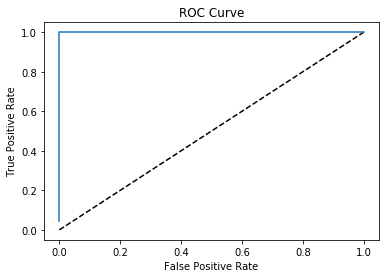

AUC: 1.0


<Figure size 432x288 with 0 Axes>

In [183]:
y_pred = best_model.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred_prob = best_model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#plt.savefig('data/ROC Curve 2014')
plt.show()
plt.clf()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

[[1119    4]
 [ 109 1219]]
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      1123
          1       1.00      0.92      0.96      1328

avg / total       0.96      0.95      0.95      2451



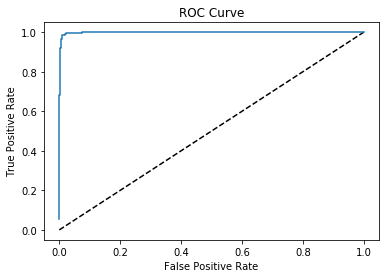

AUC: 0.9988828868456909


<Figure size 432x288 with 0 Axes>

In [184]:
y_pred2015 = best_model.predict(X_2015)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_2015, y_pred2015))
print(classification_report(y_2015, y_pred2015))

y_pred_prob2015 = best_model.predict_proba(X_2015)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_2015, y_pred_prob2015)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#plt.savefig('data/ROC Curve 2015')
plt.show()
plt.clf()
print("AUC: {}".format(roc_auc_score(y_2015, y_pred_prob2015)))


[[1226    4]
 [   0 1230]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1230
          1       1.00      1.00      1.00      1230

avg / total       1.00      1.00      1.00      2460



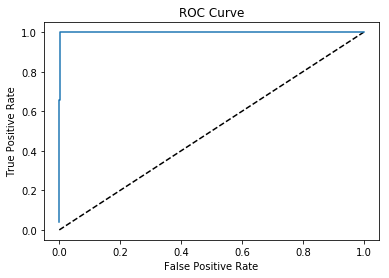

AUC: 0.9994712142243374


<Figure size 432x288 with 0 Axes>

In [185]:
y_pred2016 = best_model.predict(X_2016)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_2016, y_pred2016))
print(classification_report(y_2016, y_pred2016))

y_pred_prob2016 = best_model.predict_proba(X_2016)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_2016, y_pred_prob2016)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#plt.savefig('data/ROC Curve 2016')
plt.show()
plt.clf()
print("AUC: {}".format(roc_auc_score(y_2016, y_pred_prob2016)))


[[1226    4]
 [   0 1230]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1230
          1       1.00      1.00      1.00      1230

avg / total       1.00      1.00      1.00      2460



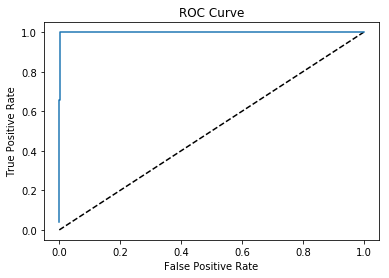

AUC: 0.9994712142243374


<Figure size 432x288 with 0 Axes>

In [186]:
y_pred2017 = best_model.predict(X_2017)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_2017, y_pred2017))
print(classification_report(y_2017, y_pred2017))

y_pred_prob2017 = best_model.predict_proba(X_2017)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_2017, y_pred_prob2017)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#plt.savefig('data/ROC Curve 2017')
plt.show()
plt.clf()
print("AUC: {}".format(roc_auc_score(y_2017, y_pred_prob2017)))


Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9994378864530635
[[394   0]
 [  0 369]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       394
          1       1.00      1.00      1.00       369

avg / total       1.00      1.00      1.00       763



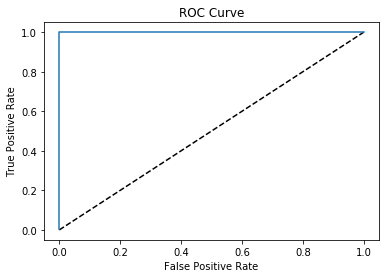

AUC: 1.0


<Figure size 432x288 with 0 Axes>

In [187]:
best_model2 = logReg_cv.fit(X_2018train, y_2018train)

print("Tuned Logistic Regression Parameter: {}".format(best_model2.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(best_model2.best_score_))

y_pred2018 = best_model2.predict(X_2018test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_2018test, y_pred2018))
print(classification_report(y_2018test, y_pred2018))

y_pred_prob2018 = best_model2.predict_proba(X_2018test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_2018test, y_pred_prob2018)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('data/ROC Curve 2018')
plt.show()
plt.clf()
print("AUC: {}".format(roc_auc_score(y_2018test, y_pred_prob2018)))


[[380   1]
 [  1 380]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       381
          1       1.00      1.00      1.00       381

avg / total       1.00      1.00      1.00       762



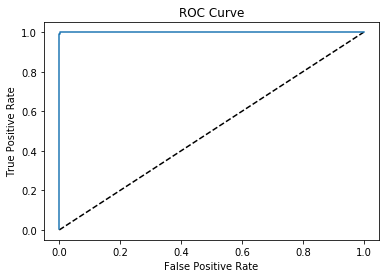

AUC: 0.999979333292


<Figure size 432x288 with 0 Axes>

In [190]:
y_pred2019 = best_model2.predict(X_2019)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_2019, y_pred2019))
print(classification_report(y_2019, y_pred2019))

y_pred_prob2019 = best_model2.predict_proba(X_2019)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_2019, y_pred_prob2019)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('data/ROC Curve 2019')
plt.show()
plt.clf()
print("AUC: {}".format(roc_auc_score(y_2019, y_pred_prob2019)))

In [84]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 5}
Best score is 0.7200929152148664


In [85]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.48      0.99      0.64       355
          1       0.00      0.00      0.00       383

avg / total       0.23      0.48      0.31       738



In [86]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))

Accuracy with Scaling: 0.6734417344173442
Accuracy without Scaling: 0.518970189701897


In [87]:
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9776422764227642
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       240
          1       0.98      0.97      0.98       252

avg / total       0.98      0.98      0.98       492

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


In [156]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
print(bayes)

GaussianNB(priors=None)


In [159]:
y_pred = bayes.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[247 108]
 [134 249]]
             precision    recall  f1-score   support

          0       0.65      0.70      0.67       355
          1       0.70      0.65      0.67       383

avg / total       0.67      0.67      0.67       738



In [165]:
bayes2 = GaussianNB()
bayes2.fit(X_2018train, y_train)

y_pred2018 = bayes2.predict(X_2018test)
print(confusion_matrix(y_2018test, y_pred2018))
print(classification_report(y_2018test, y_pred2018))

y_pred2019 = bayes2.predict(X_2019)
print(confusion_matrix(y_2019, y_pred2019))
print(classification_report(y_2019, y_pred2019))

[[247 108]
 [134 249]]
             precision    recall  f1-score   support

          0       0.65      0.70      0.67       355
          1       0.70      0.65      0.67       383

avg / total       0.67      0.67      0.67       738



ValueError: operands could not be broadcast together with shapes (762,51) (50,) 